### Imports

In [48]:
import os
import pandas as pd
from PIL import Image, ImageEnhance
import numpy as np
import albumentations as al
from PIL import ImageOps
import matplotlib.pyplot as plt

### Defining necessary paths

In [38]:
train_image_folder_path = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Dataset/train_images/train_images'
test_image_folder_path = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Dataset/test_images/test_images'
val_image_folder_path = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Dataset/val_images/val_images'

preprocessed_train_folder = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Preprocessed_Dataset/Preprocessed_train_images'
preprocessed_test_folder = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Preprocessed_Dataset/Preprocessed_test_images'
preprocessed_val_folder = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Preprocessed_Dataset/Preprocessed_val_images'

train_csv_path = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Dataset/train.csv'
val_csv_path = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Dataset/valid.csv'
test_csv_path = '/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Dataset/test.csv'

### Loading CSVs and setting up output location

In [39]:
train_data = pd.read_csv(train_csv_path)
val_data = pd.read_csv(val_csv_path)
test_data = pd.read_csv(test_csv_path)

folders = [preprocessed_train_folder, preprocessed_test_folder, preprocessed_val_folder]
for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

### Image Enhancements

In [40]:
def enhance_image(image_path, target_size=1024):
    image = Image.open(image_path).convert('RGB')

    # Maintain aspect ratio while resizing
    original_width, original_height = image.size
    if original_width > original_height:
        new_width = target_size
        new_height = int(target_size * original_height / original_width)
    else:
        new_height = target_size
        new_width = int(target_size * original_width / original_height)

    # Resizing all images to one target size
    image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Adding black background to make all images squares
    image = ImageOps.pad(image, (target_size, target_size), color=(0, 0, 0))

    # Enhancing the image with an increase in brightness
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1.3)

    # Enhancing the image with an increase in contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.5)

    # Enhancing the image with an increase in sharpness
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(1.5)

    return np.array(image)

### Train set image augmentation

In [41]:
def augment_image(image, diagnosis, augmentation_count):
    augmented_images = []
    augmentations = al.Compose([
        al.RandomRotate90(p=0.5),
        al.HorizontalFlip(p=0.5),
        al.VerticalFlip(p=0.5),
    ])
    for i in range(augmentation_count):
        augmented = augmentations(image=image)['image']
        augmented_images.append(augmented)
    return augmented_images

### Process images function

In [42]:
def process_and_save_images(data, input_folder, output_folder, augment=False, augmentation_factors=None):
    processed_data = []
    for index, row in data.iterrows():
        print(f"Processing image {index + 1} of {len(data)}...")
        image_id = row['id_code']
        diagnosis = row['diagnosis']
        image_path = os.path.join(input_folder, f"{image_id}.png")

        if os.path.exists(image_path):
            # Enhance image
            enhanced_image = enhance_image(image_path)

            # Save enhanced image
            enhanced_path = os.path.join(output_folder, f"{image_id}.png")
            Image.fromarray(enhanced_image).save(enhanced_path)
            processed_data.append((f"{image_id}", diagnosis))

            # Augment if specified depending on the imbalances
            if augment and diagnosis in augmentation_factors:
                augmentation_count = augmentation_factors[diagnosis]
                augmented_images = augment_image(enhanced_image, diagnosis, augmentation_count)
                for idx, aug_img in enumerate(augmented_images):
                    aug_path = os.path.join(output_folder, f"{image_id}_aug{idx}.png")
                    Image.fromarray(aug_img).save(aug_path)
                    processed_data.append((f"{image_id}_aug{idx}", diagnosis))
    return processed_data

### Preprocess train data with augmentation

In [43]:
augmentation_factors = {0: 0, 1: 5, 2: 2, 3: 8, 4: 6}

train_processed = process_and_save_images(train_data, train_image_folder_path, preprocessed_train_folder, augment=True, augmentation_factors=augmentation_factors)

Processing image 1 of 2930...
Processing image 2 of 2930...
Processing image 3 of 2930...
Processing image 4 of 2930...
Processing image 5 of 2930...
Processing image 6 of 2930...
Processing image 7 of 2930...
Processing image 8 of 2930...
Processing image 9 of 2930...
Processing image 10 of 2930...
Processing image 11 of 2930...
Processing image 12 of 2930...
Processing image 13 of 2930...
Processing image 14 of 2930...
Processing image 15 of 2930...
Processing image 16 of 2930...
Processing image 17 of 2930...
Processing image 18 of 2930...
Processing image 19 of 2930...
Processing image 20 of 2930...
Processing image 21 of 2930...
Processing image 22 of 2930...
Processing image 23 of 2930...
Processing image 24 of 2930...
Processing image 25 of 2930...
Processing image 26 of 2930...
Processing image 27 of 2930...
Processing image 28 of 2930...
Processing image 29 of 2930...
Processing image 30 of 2930...
Processing image 31 of 2930...
Processing image 32 of 2930...
Processing image 

### Preprocess test data

In [44]:
test_processed = process_and_save_images(test_data, test_image_folder_path, preprocessed_test_folder, augment=False)

Processing image 1 of 366...
Processing image 2 of 366...
Processing image 3 of 366...
Processing image 4 of 366...
Processing image 5 of 366...
Processing image 6 of 366...
Processing image 7 of 366...
Processing image 8 of 366...
Processing image 9 of 366...
Processing image 10 of 366...
Processing image 11 of 366...
Processing image 12 of 366...
Processing image 13 of 366...
Processing image 14 of 366...
Processing image 15 of 366...
Processing image 16 of 366...
Processing image 17 of 366...
Processing image 18 of 366...
Processing image 19 of 366...
Processing image 20 of 366...
Processing image 21 of 366...
Processing image 22 of 366...
Processing image 23 of 366...
Processing image 24 of 366...
Processing image 25 of 366...
Processing image 26 of 366...
Processing image 27 of 366...
Processing image 28 of 366...
Processing image 29 of 366...
Processing image 30 of 366...
Processing image 31 of 366...
Processing image 32 of 366...
Processing image 33 of 366...
Processing image 34

### Preprocess validation data

In [45]:
val_processed = process_and_save_images(val_data, val_image_folder_path, preprocessed_val_folder, augment=False)

Processing image 1 of 366...
Processing image 2 of 366...
Processing image 3 of 366...
Processing image 4 of 366...
Processing image 5 of 366...
Processing image 6 of 366...
Processing image 7 of 366...
Processing image 8 of 366...
Processing image 9 of 366...
Processing image 10 of 366...
Processing image 11 of 366...
Processing image 12 of 366...
Processing image 13 of 366...
Processing image 14 of 366...
Processing image 15 of 366...
Processing image 16 of 366...
Processing image 17 of 366...
Processing image 18 of 366...
Processing image 19 of 366...
Processing image 20 of 366...
Processing image 21 of 366...
Processing image 22 of 366...
Processing image 23 of 366...
Processing image 24 of 366...
Processing image 25 of 366...
Processing image 26 of 366...
Processing image 27 of 366...
Processing image 28 of 366...
Processing image 29 of 366...
Processing image 30 of 366...
Processing image 31 of 366...
Processing image 32 of 366...
Processing image 33 of 366...
Processing image 34

### Saving to new CSVs

In [47]:
pd.DataFrame(train_processed, columns=['id_code', 'diagnosis']).to_csv('/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Preprocessed_Dataset/preprocessed_train.csv', index=False)
pd.DataFrame(val_processed, columns=['id_code', 'diagnosis']).to_csv('/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Preprocessed_Dataset/preprocessed_val.csv', index=False)
pd.DataFrame(test_processed, columns=['id_code', 'diagnosis']).to_csv('/Users/teransenevirathne/Desktop/DSGP-24-Retina94/Preprocessed_Dataset/preprocessed_test.csv', index=False)

### Train dataset analysis after augmentation

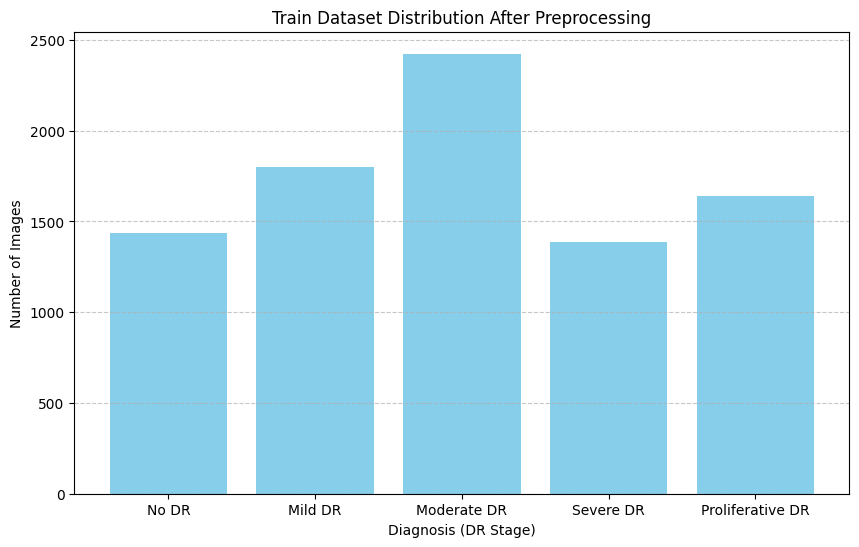

In [49]:
train_df = pd.DataFrame(train_processed, columns=['id_code', 'diagnosis'])
train_distribution = train_df['diagnosis'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(train_distribution.index, train_distribution.values, color='skyblue')
plt.title("Train Dataset Distribution After Preprocessing")
plt.xlabel("Diagnosis (DR Stage)")
plt.ylabel("Number of Images")
plt.xticks([0, 1, 2, 3, 4], ["No DR", "Mild DR", "Moderate DR", "Severe DR", "Proliferative DR"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()